Sklearn - крутой инструмент для работы с основными методами ML, который содержит в себе всё необходимо для всех этапов построения модели.




Как работать c классическими ML задачами в Sklearn:
1. Загружаем/создаём выборку  
2. Предобрабатываем
3. Обучаем модель: fit()
4. Запускаем на тесте: predict()
5. Оцениваем качество


Основные функции для обучения с учителем: 

* model.predict(X_test) - предсказать значения целевой переменной

* model.predict_proba() - выдать «степень уверенности» в ответе (вероятность) – для некоторых моделей

* model.decision_function() решающая функция – для некоторых моделей

* model.score() - в большинстве моделей встроены методы оценки их качества работы

* model.transform() - для отбора признаков (feature
selection) «сжимает» обучающую матрицу. Для регрессионных моделей и классификаторов (linear, RF и т.п.) выделяет наиболее информативные признаки

In [ ]:
#Установим последнюю версию Sklearn
#!pip install -U scikit-learn

In [13]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  4 2020, 02:22:02)  [Clang 10.0.0 ]
executable: /opt/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


# Загрузка данных из sklearn



Данные из датасета Калифорнийского университета в Ирвайн “Breast Cancer Wisconsin” (рак груди, Висконсин).   
Характеристики - свойства клеточных ядер новообразования (например, строение), таргет - злокачественное или доброкачественное новообразование.

In [14]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
random_state = 42
X, y = load_breast_cancer(return_X_y=True, as_frame = True)

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [20]:
y.shape

(569,)

In [21]:
X.shape

(569, 30)

In [22]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

#Разобьем выборку на train-test:

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=23)

In [24]:
X_train.shape

(341, 30)

In [25]:
X_test.shape

(228, 30)

# Применение модели и оценка качества



### Наивный Байес


https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes



In [26]:
from sklearn.naive_bayes import  BernoulliNB

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
import numpy as np

print (np.mean(prediction == y_test))

0.618421052631579


In [28]:
from sklearn.naive_bayes import  MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [29]:
prediction

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0])

In [30]:
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0])

In [31]:
print (np.mean(prediction == y_test))

0.8859649122807017


In [32]:
from sklearn.naive_bayes import  GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [33]:
print (np.mean(prediction == y_test))

0.9473684210526315


In [34]:
#X_train.corr()

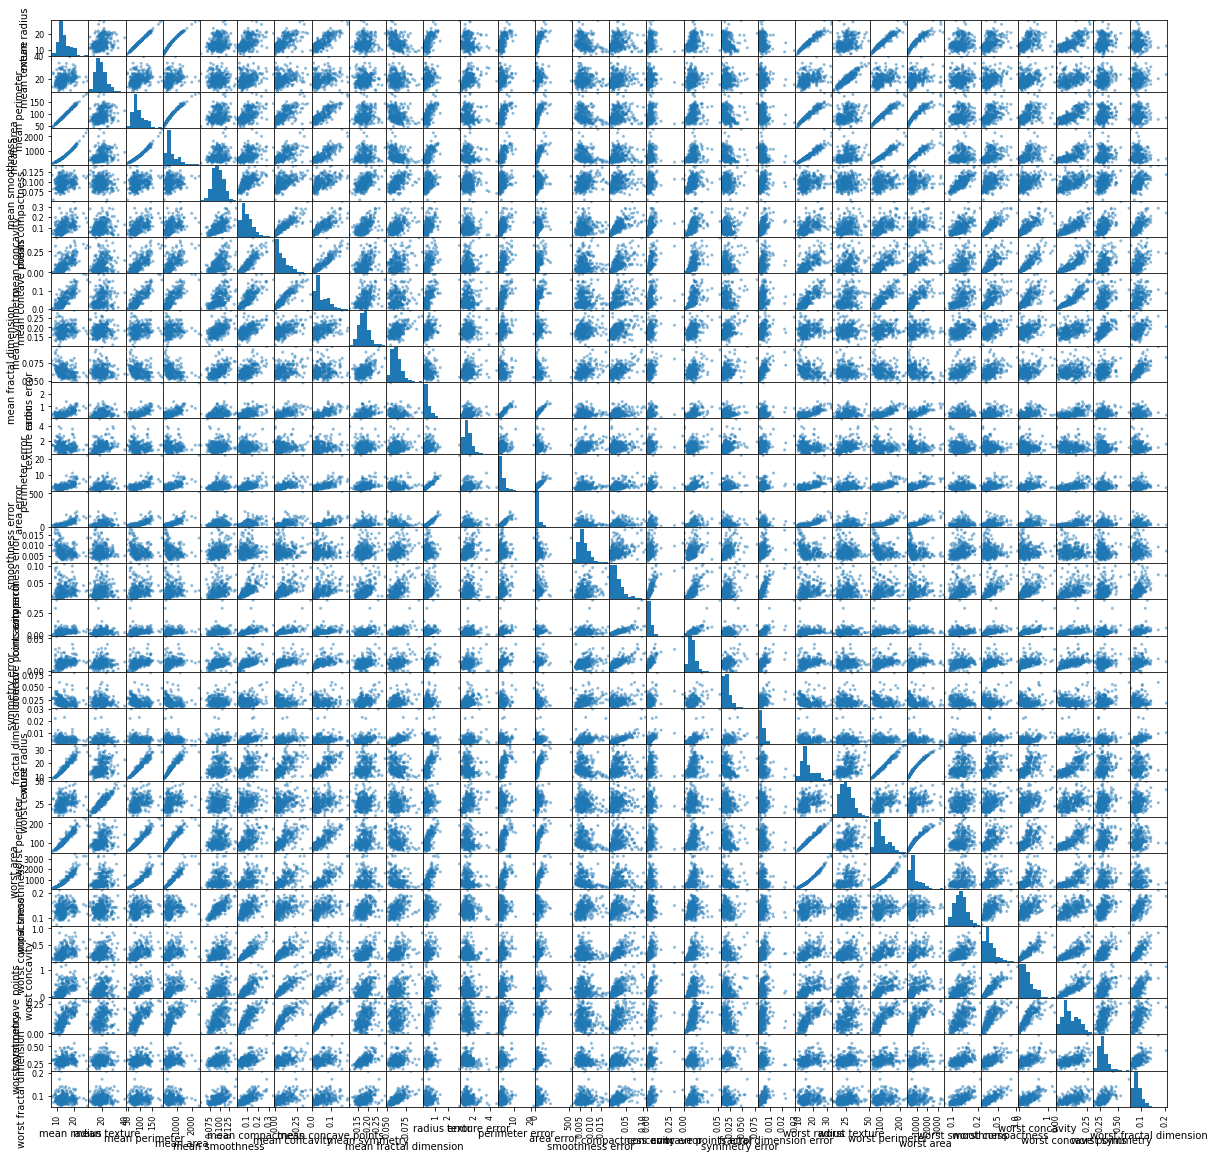

In [35]:
pd.plotting.scatter_matrix(X_train, figsize=(20,20));

Посмотреть какие параметры можно тюнить можно здесь:


*   https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
*   https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html?highlight=multinomialnb#sklearn.naive_bayes.MultinomialNB



На основе увиденного на гистограммах возникает идея прологарифмировать (некоторые) признаки. Для иллюстративных целей прологарифмируем их все (что не стоит повторять :) )

In [36]:
def logfunc(df, indices):
  res = df.copy()
  for i in indices:
    res.iloc[:,i] = np.log1p(res.iloc[:,i])
  return res


In [37]:
X_train.shape

(341, 30)

In [38]:
#ind = [7,8,11,12,13,14, 15,16,17,19,20, 24,26,27]
classifier = GaussianNB()
classifier.fit(logfunc(X_train, range(30)), y_train)
prediction = classifier.predict(logfunc(X_test, range(30)))

print (np.mean(prediction == y_test))


0.9605263157894737


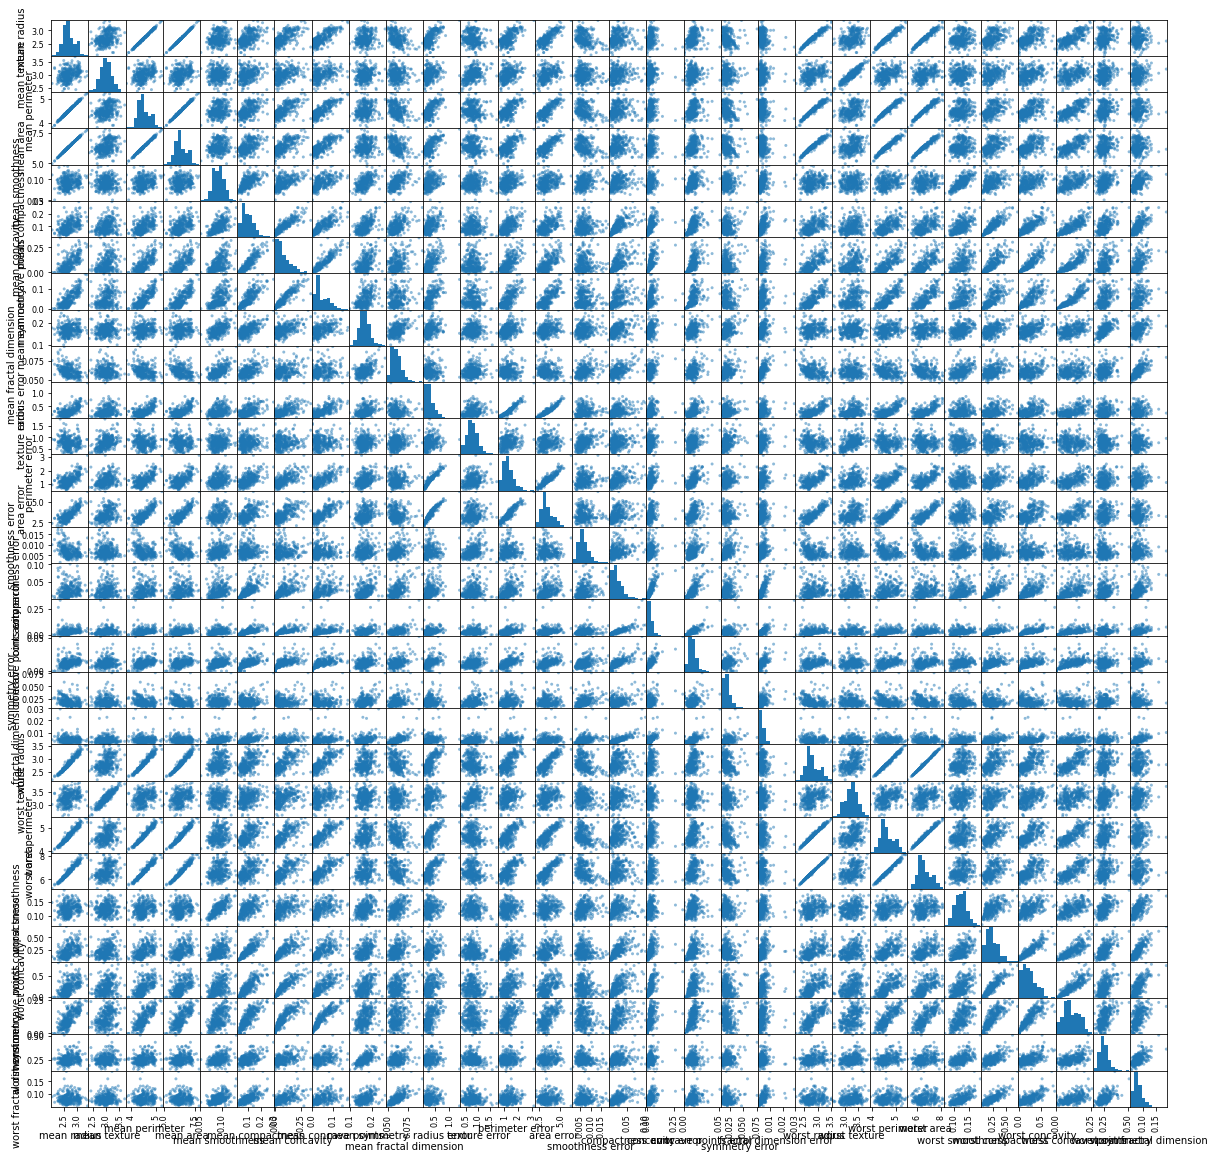

In [40]:
pd.plotting.scatter_matrix(logfunc(X_train, range(30)), figsize=(20,20));

## Ближайшие соседи


In [24]:
import numpy as np

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [25]:
%%time
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

CPU times: user 43.4 ms, sys: 23.3 ms, total: 66.7 ms
Wall time: 1.36 s


In [26]:
print (np.mean(prediction == y_test))

0.9122807017543859


In [27]:
%%time
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

print (np.mean(prediction == y_test))

0.9078947368421053
CPU times: user 12.5 ms, sys: 1.58 ms, total: 14.1 ms
Wall time: 13 ms


In [33]:
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


In [34]:
#Так и тянет сделать цикл

n_nb = range(1, 30)
res = []

for i in n_nb: 
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    prediction = neigh.predict(X_test)

    res.append((np.mean(prediction == y_test)))

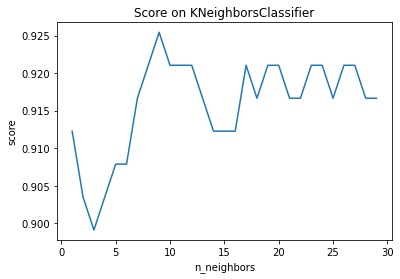

In [35]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

In [36]:
%%time
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

print (np.mean(prediction == y_test))

0.9254385964912281
CPU times: user 12.8 ms, sys: 1.43 ms, total: 14.3 ms
Wall time: 12.8 ms


### Логистическая регрессия с помощью sklearn





In [37]:
#Попробум применить логистическую регресиию:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [38]:
prediction[:10]

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [39]:
import numpy as np

print (np.mean(prediction == y_test))
print (classifier.score(X_test, y_test)) 

0.9298245614035088
0.9298245614035088


In [40]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction))

[[ 76  11]
 [  5 136]]


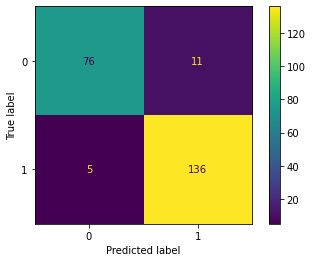

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        87
           1       0.93      0.96      0.94       141

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [43]:
classifier.coef_

array([[ 1.0052723 ,  0.19674668, -0.28823838,  0.03500818, -0.10988165,
        -0.22120168, -0.3541539 , -0.17931709, -0.13450787, -0.03212529,
        -0.09526226,  0.5800012 ,  0.18115288, -0.04744487, -0.00890465,
        -0.00515916, -0.02896482, -0.01950522, -0.02439421, -0.00122627,
         0.22950129, -0.40623438, -0.15457389, -0.0243821 , -0.19871957,
        -0.56462724, -0.84657325, -0.3428364 , -0.34684265, -0.07762615]])

In [44]:
pd.DataFrame(data = [X_train.columns, classifier.coef_[0]])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,1.00527,0.196747,-0.288238,0.0350082,-0.109882,-0.221202,-0.354154,-0.179317,-0.134508,-0.0321253,...,0.229501,-0.406234,-0.154574,-0.0243821,-0.19872,-0.564627,-0.846573,-0.342836,-0.346843,-0.0776261


In [45]:
classifier.intercept_[0]

31.34398462022172

### Логистическая регрессия с помощью StatsModels



https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html

In [60]:
import statsmodels.api as sm

In [65]:
X_train[newcols].columns

NameError: name 'newcols' is not defined

In [ ]:
X_train['ones'] = 1
X_test['ones'] = 1

In [ ]:
model = sm.Logit(y_train, X_train[newcols+['ones']])
result = model.fit(method='bfgs', maxiter=1000)

In [ ]:
print (np.mean((result.predict(X_test[newcols+['ones']]) >= 0.5).astype(int).values == y_test))

In [ ]:
print(result.summary())

Эту функцию я позаимствовал из открытого источника. Попробуйте переделать для работы с методом, используемым для обучения выше, а целью forward selection поставьте BIC.  Сколько фичей отберется и какое качество при этом вы получите?

In [ ]:
# Вот эту функцию вам потребуется модифицировать
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = sm.Logit(data, response).fit(method='bfgs', maxiter=1000).rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
forward_selected(X_train, y_train)

***Задание: попробуйте получить скор на тесте > 0.95 любым из предложенных методов***

# Работа с регрессией

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()
X, y = data['data'], data['target']

In [ ]:
data

In [ ]:
print(data['DESCR'])

In [ ]:
data.feature_names

In [ ]:
X_df = pd.DataFrame(data = X, columns=data.feature_names)
y_df = pd.Series(y)

In [48]:
X_df.head()

NameError: name 'X_df' is not defined

In [49]:
X_df.describe()

NameError: name 'X_df' is not defined

In [50]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_df, y_df, test_size=0.4, random_state=23, shuffle = False)

NameError: name 'X_df' is not defined

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(prediction, y_test)

0.2014413869297437

In [53]:
model.coef_

array([ 5.26812360e-01, -2.79619367e-03, -5.72514148e-02, -9.27146632e-04,
        1.63254970e+00,  4.51533700e+00, -1.76399067e+00, -7.55410583e-01,
       -4.72384468e-01, -5.98345476e+00, -3.97944706e-01, -2.62106996e-02,
        3.98427287e-02,  5.19349515e-04, -5.33725085e+00, -1.42482502e+00,
        3.51870215e+00, -5.80992971e+00, -2.78372068e-01,  8.99626412e+00,
       -2.43037048e-01, -4.96057645e-03,  8.95214232e-04,  1.27750635e-03,
       -1.18349573e+00,  3.19190787e-01, -1.75257848e-01, -1.71264556e+00,
       -2.78977760e-01, -3.42317227e+00])

In [54]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
mean_absolute_error(prediction, y_test)

0.21518449323505626

In [55]:
model.coef_

array([ 2.37735368e-01,  7.31395576e-03, -1.13672853e-02, -1.09256962e-03,
       -3.59802431e-02, -3.57238178e-02, -9.68521803e-02, -6.86147286e-02,
       -4.64782568e-02, -1.09310540e-02, -6.11860017e-02, -6.14263311e-03,
        4.22543813e-03, -1.07882377e-04, -5.75369061e-03,  1.14171820e-02,
        2.59170655e-02, -4.63108589e-03, -3.77694960e-03, -1.65865750e-04,
       -2.36970988e-01, -1.42491819e-02, -1.24320823e-03,  1.25667579e-03,
       -7.35099796e-02, -6.68279897e-02, -1.86961319e-01, -1.18901217e-01,
       -9.06185815e-02, -3.13678692e-02])

Сделайте перебор параметра с помощью цикла. При каком параметре будет наилучшее качество?
 

In [56]:
X_train['RAD'].value_counts()

KeyError: 'RAD'

In [57]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown='ignore')

enc_df_train = pd.DataFrame(enc.fit_transform(X_train[['RAD']]).toarray())
enc_df_test = pd.DataFrame(enc.fit_transform(X_test[['RAD']]).toarray())

enc_df_train.columns = ['RAD_' + str(i) for i in range(len(enc_df_train.columns))]
enc_df_test.columns = ['RAD_' + str(i) for i in range(len(enc_df_test.columns))]


KeyError: "None of [Index(['RAD'], dtype='object')] are in the [columns]"

In [58]:
for i in enc_df_train:
  X_train[i] = enc_df_train[i].values

for i in enc_df_test:
  X_test[i] = enc_df_test[i].values

NameError: name 'enc_df_train' is not defined

In [ ]:
X_train = X_train.drop('RAD', axis = 1)
X_test = X_test.drop('RAD', axis = 1)

In [ ]:
model = Ridge(alpha = 5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
mean_absolute_error(prediction, y_test)